### Import libraries 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore")

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Load data, split to features and labels 

In [3]:
address=r"F:\Tutorials\Certified program in MACHINE LEARNING and ARTIFICIAL INTELLIGENCE\Assignments\case_study_3\mobile_price_classification.csv"
data=pd.read_csv(address)

In [4]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
X=data.drop(columns=['price_range'])
y=data['price_range']

In [7]:
y.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

#### convert labels to one hot encoding 

In [8]:
y=pd.get_dummies(y)

In [9]:
X.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


### Split data to train set and test set 

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 1500 records.
The testing dataset has 500 records.


#### scale data 

In [11]:
def scale_std(X_train,X_test):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std,X_test_std

In [12]:
X_train_std,X_test_std=scale_std(X_train,X_test)

### Create ANN model 

In [13]:
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train_std, y_train, epochs=100)

Epoch 1/100
47/47 [==============================] - 0s 806us/step - loss: 0.6444 - accuracy: 0.2880
Epoch 2/100
47/47 [==============================] - 0s 776us/step - loss: 0.5864 - accuracy: 0.3167
Epoch 3/100
47/47 [==============================] - 0s 792us/step - loss: 0.5489 - accuracy: 0.3707
Epoch 4/100
47/47 [==============================] - 0s 770us/step - loss: 0.5221 - accuracy: 0.4113
Epoch 5/100
47/47 [==============================] - 0s 938us/step - loss: 0.5005 - accuracy: 0.4487
Epoch 6/100
47/47 [==============================] - 0s 874us/step - loss: 0.4809 - accuracy: 0.4860
Epoch 7/100
47/47 [==============================] - 0s 771us/step - loss: 0.4624 - accuracy: 0.5227
Epoch 8/100
47/47 [==============================] - 0s 916us/step - loss: 0.4441 - accuracy: 0.5600
Epoch 9/100
47/47 [==============================] - 0s 825us/step - loss: 0.4265 - accuracy: 0.5840
Epoch 10/100
47/47 [==============================] - 0s 785us/step - loss: 0.4088 - accura

### Accuarcy of model 

In [15]:
y_pred = model.predict(X_test_std)
y_pred

array([[9.69922089e-01, 3.00750459e-02, 2.86455850e-06, 3.95242851e-17],
       [6.39269440e-05, 6.49792206e-02, 9.33590920e-01, 1.36593245e-03],
       [3.80808739e-02, 9.38839780e-01, 2.30793452e-02, 4.40256866e-10],
       ...,
       [3.66226459e-10, 1.27325643e-04, 8.77374733e-01, 1.22497941e-01],
       [2.95394947e-20, 7.24378209e-11, 9.02823148e-04, 9.99097177e-01],
       [1.69399548e-01, 8.29016429e-01, 1.58402309e-03, 1.86877587e-10]])

In [16]:
test_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(np.array(y_test),axis=1)

In [17]:
def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix( ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

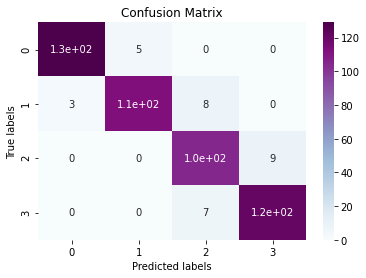

In [18]:
plot_conf(test_pred,y_test)

In [19]:
acc=accuracy_score(y_test, test_pred)
print("Accuracy: ", acc)

Accuracy:  0.936


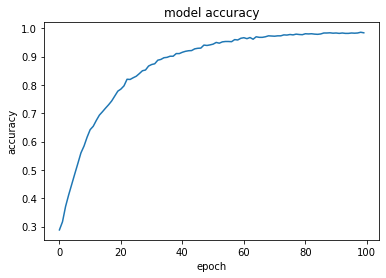

In [20]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()